In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [16]:
data_aff = pd.read_csv('/home/hasan/Documents/BitRepos/orocv2/affor_datal.csv')

In [17]:
data_aff.head()

,HITId,HITTypeId,Title,Description,Keywords,Reward,CreationTime,MaxAssignments,RequesterAnnotation,AssignmentDurationInSeconds,...,LifetimeApprovalRate,Last30DaysApprovalRate,Last7DaysApprovalRate,Input.original_language,Input.original_text,Answer.likeability,Answer.novelty,Answer.usability,Approve,Reject
0,37NXA7GVSUJBU2XQYM2SVK13I3HVLZ,3UY9ZAUDME5BR52BHJHDKDGHLYFALG,"What is the novelty,likability and usability o...",In this task you will answer what is the level...,"item, equality, comparison",$0.02,Wed Jun 19 07:20:55 PDT 2019,5,BatchId:3680734;OriginalHitTemplateId:928390889;,1200,...,0% (0/0),0% (0/0),0% (0/0),Cup,as food container,3,2,2,NaN,NaN
1,37NXA7GVSUJBU2XQYM2SVK13I3HVLZ,3UY9ZAUDME5BR52BHJHDKDGHLYFALG,"What is the novelty,likability and usability o...",In this task you will answer what is the level...,"item, equality, comparison",$0.02,Wed Jun 19 07:20:55 PDT 2019,5,BatchId:3680734;OriginalHitTemplateId:928390889;,1200,...,0% (0/2),0% (0/2),0% (0/0),Cup,as food container,6,1,7,NaN,NaN
2,37NXA7GVSUJBU2XQYM2SVK13I3HVLZ,3UY9ZAUDME5BR52BHJHDKDGHLYFALG,"What is the novelty,likability and usability o...",In this task you will answer what is the level...,"item, equality, comparison",$0.02,Wed Jun 19 07:20:55 PDT 2019,5,BatchId:3680734;OriginalHitTemplateId:928390889;,1200,...,0% (0/0),0% (0/0),0% (0/0),Cup,as food container,4,5,3,NaN,NaN
3,37NXA7GVSUJBU2XQYM2SVK13I3HVLZ,3UY9ZAUDME5BR52BHJHDKDGHLYFALG,"What is the novelty,likability and usability o...",In this task you will answer what is the level...,"item, equality, comparison",$0.02,Wed Jun 19 07:20:55 PDT 2019,5,BatchId:3680734;OriginalHitTemplateId:928390889;,1200,...,0% (0/2),0% (0/2),0% (0/0),Cup,as food container,5,4,7,NaN,NaN
4,37NXA7GVSUJBU2XQYM2SVK13I3HVLZ,3UY9ZAUDME5BR52BHJHDKDGHLYFALG,"What is the novelty,likability and usability o...",In this task you will answer what is the level...,"item, equality, comparison",$0.02,Wed Jun 19 07:20:55 PDT 2019,5,BatchId:3680734;OriginalHitTemplateId:928390889;,1200,...,0% (0/0),0% (0/0),0% (0/0),Cup,as food container,4,5,6,NaN,NaN


In [18]:
data_f = data_aff.drop(['HITId','HITTypeId','Title','Description','Keywords','Reward','CreationTime','MaxAssignments','RequesterFeedback','WorkTimeInSeconds','LifetimeApprovalRate','Last30DaysApprovalRate','Last7DaysApprovalRate','Approve','Reject','RequesterAnnotation','AssignmentDurationInSeconds','AutoApprovalDelayInSeconds','Expiration','NumberOfSimilarHITs','LifetimeInSeconds','AssignmentId','AssignmentStatus','AcceptTime','SubmitTime','AutoApprovalTime','RejectionTime','ApprovalTime'],axis=1)

In [19]:
data_f.head()

,WorkerId,Input.original_language,Input.original_text,Answer.likeability,Answer.novelty,Answer.usability
0,A2GKX7OV3D8A3T,Cup,as food container,3,2,2
1,A14MCHQB6Z8MVT,Cup,as food container,6,1,7
2,ABMH09TPJ72JW,Cup,as food container,4,5,3
3,A30OWLTYVF4Y79,Cup,as food container,5,4,7
4,A1C4LNTWGUOD4P,Cup,as food container,4,5,6


In [20]:
data_f.rename(index=str, columns={"Input.original_language":"object","Input.original_text":"affordances","Answer.likeability"
:"likeability",'Answer.novelty':'novelty','Answer.usability':'usability'},inplace=True)

In [21]:
data_f.head()

,WorkerId,object,affordances,likeability,novelty,usability
0,A2GKX7OV3D8A3T,Cup,as food container,3,2,2
1,A14MCHQB6Z8MVT,Cup,as food container,6,1,7
2,ABMH09TPJ72JW,Cup,as food container,4,5,3
3,A30OWLTYVF4Y79,Cup,as food container,5,4,7
4,A1C4LNTWGUOD4P,Cup,as food container,4,5,6


In [22]:
def detect_outlier(data_1):
    outliers=[]
    #print(data_1)
    threshold=2
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)  
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        #print(np.abs(z_score))
        if np.abs(z_score) >= threshold:
            outliers.append(y)
    return outliers

In [23]:
def percentile_20(x):
    q1=x.quantile(0.2)
    q3=x.quantile(0.8)
    x =x.values.tolist()
    f_val=detect_outlier(x)
    return f_val

In [24]:
def same_number(df):
    #print(df)
    if(len(set(df))==1):
        return 1
    else:
        return 0

In [25]:

data_outlier=data_f.groupby(by="object", as_index=False, sort=False)["usability"].agg([percentile_20])

data_outlier_same= data_f.groupby(by="WorkerId", as_index=False, sort=False)["usability"].agg([same_number])

/home/hasan/anaconda3/envs/BD/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


In [26]:
data_outlier_same.head()

,same_number
WorkerId,
A2GKX7OV3D8A3T,0
A14MCHQB6Z8MVT,0
ABMH09TPJ72JW,0
A30OWLTYVF4Y79,0
A1C4LNTWGUOD4P,0


In [27]:
data_outlier.head()

,percentile_20
object,
Cup,[]
Book,[]
Newspaper,[]
Vase,[]
Wallpaper,[]


In [28]:
data_f.to_csv(r'/home/hasan/Documents/BitRepos/orocv2/Object_affordancel.csv')

In [35]:
data_f = pd.read_csv('/home/hasan/Documents/BitRepos/orocv2/Object_affordancel.csv')

In [42]:
data_f.drop('Unnamed: 0', axis=1, inplace=True)

In [43]:
aff_mean = data_f.groupby('object').mean().reset_index()
aff_sd = data_f.groupby('object').std().reset_index()

In [44]:
aff_mean.head()

,object,likeability,novelty,usability
0,Ashtray,1.2,2.6,2.6
1,Bathroom Towel,3.6,4.0,6.0
2,Blanket,3.0,2.8,4.8
3,Book,7.0,3.8,7.0
4,Bottle,7.0,3.6,7.0


In [45]:
total_mean=aff_mean.mean().reset_index()
total_mean



,index,0
0,likeability,3.340
1,novelty,3.992
2,usability,4.060


In [46]:

total_sd=aff_sd.mean().reset_index()
total_sd

,index,0
0,likeability,1.270416
1,novelty,1.903928
2,usability,1.355739


In [47]:
aff_mean


,object,likeability,novelty,usability
0,Ashtray,1.2,2.6,2.6
1,Bathroom Towel,3.6,4.0,6.0
2,Blanket,3.0,2.8,4.8
3,Book,7.0,3.8,7.0
4,Bottle,7.0,3.6,7.0
5,Bowl,6.6,1.6,7.0
6,Broom,1.4,3.0,1.6
7,Can,5.0,3.0,6.0
8,Can opener,1.2,2.8,1.4
9,Candle Holder,4.8,5.4,5.6


In [48]:
aff_sd

,object,likeability,novelty,usability
0,Ashtray,0.447214,1.816590,1.949359
1,Bathroom Towel,1.816590,0.707107,1.732051
2,Blanket,1.581139,0.836660,1.643168
3,Book,0.000000,2.949576,0.000000
4,Bottle,0.000000,3.130495,0.000000
5,Bowl,0.894427,0.547723,0.000000
6,Broom,0.547723,1.581139,0.547723
7,Can,1.581139,1.224745,1.224745
8,Can opener,0.447214,2.489980,0.547723
9,Candle Holder,1.923538,1.140175,1.341641


In [49]:
aff_mean.head()
aff_mean['object'] = aff_mean.index
aff_sd['object'] = aff_sd.index

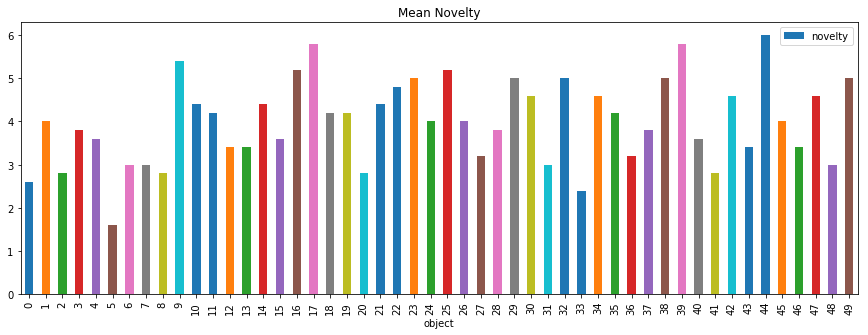

In [50]:
aff_mean.plot(figsize=(15,5),x='object',y='novelty',kind='bar',title="Mean Novelty")

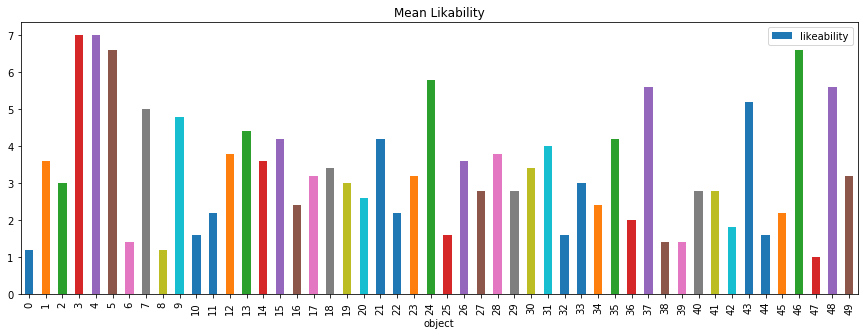

In [51]:
aff_mean.plot(figsize=(15,5),x='object',y='likeability',kind='bar',title="Mean Likability")

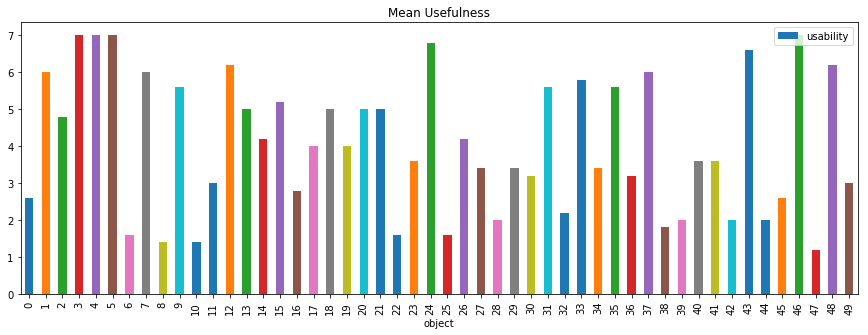

In [52]:
aff_mean.plot(figsize=(15,5),x='object',y='usability',kind='bar',title="Mean Usefulness")

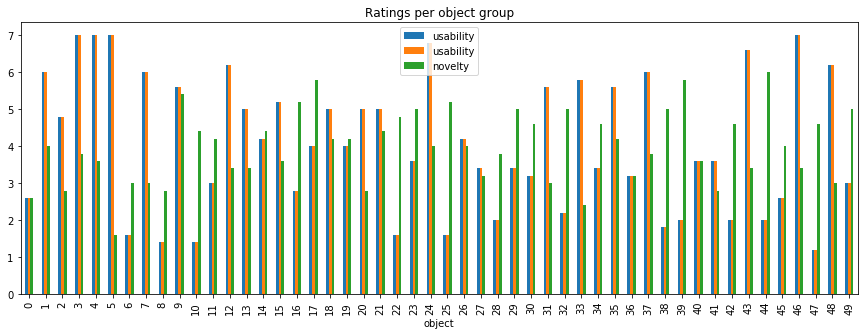

In [53]:
aff_mean.plot(figsize=(15,5),x='object',y=['usability','usability','novelty'],kind='bar',title="Ratings per object group")